<h1 align='center'>EE5907_CA2  &nbsp; &nbsp;&nbsp;&nbsp;     Yang Di &nbsp; &nbsp;&nbsp;&nbsp;    A0229522H<h1> 
<h2>Part 2: Gaussion mixed model for clustering<h2>

A Gaussian Mixture is a function that is comprised of several Gaussians, each identified by k ∈ {1,…, K}, where K is the number of clusters of our dataset. It is a universally used model for generative unsupervised learning or clustering. It is also called Expectation-Maximization Clustering or EM Clustering and is based on the optimization strategy.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import os
import cv2

In [2]:
import random

# to randomly select 25 picture sets from PIE and randomly select pictures as training set
def get_random_list(num_items, start, end, set_seed):
    random.seed(set_seed)
    selected_id = [i for i in range(start,end)]
    random.shuffle(selected_id)
    return sorted(selected_id[0:num_items])

# choose 25 PIE subjects 
selected_id = get_random_list(num_items=25, start=1, end=68,set_seed=90) 
print("Selected subset's id is shown:", selected_id)

Selected subset's id is shown: [1, 6, 11, 13, 14, 15, 16, 19, 21, 22, 26, 28, 31, 33, 36, 39, 42, 45, 46, 55, 56, 58, 59, 60, 61]


The number of chosen images: 4250
Image size: (32, 32)
Training set: 2975 (0.7) Test set: 1275 (0.3)

 randomly display ten photos from dataset


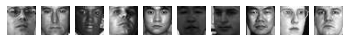

In [3]:
#to load data from chosen CMU dataset.
train_img = []
train_label = []
test_img = []
test_label = []
n_perclass=[]

for file in selected_id:
    # Please replace the address of PIE here with you PIE folder's complete address
    wd = os.path.join("PIE/",str(file))      # load work address of each subset
    chosen_img = []           
    corre_label = []
    
    for img_id in os.listdir(wd):
        path = os.path.join(wd, img_id)
        img = plt.imread(path)
        chosen_img.append(img)
        corre_label.append(int(file))
    n_perclass.append(int(len(chosen_img)))

# For each chosen subject,70% of the contained images are for training and the remaining 30% is for testing.       
    train_idx = get_random_list(num_items=round(len(chosen_img)*0.7),start=0, end=len(chosen_img), set_seed=20)
    #print(train_idx)
    
    for i in range(0,len(chosen_img)):
            if i in train_idx:
                train_img.append(chosen_img[i])
                train_label.append(corre_label[i])
            else:
                test_img.append(chosen_img[i])            
                test_label.append(corre_label[i])

            
#print("Total chosen images: ",len(chosen_img))
        # right here, i choose to use probably approach to separate images, 
        #the training number and test number can be exactly equal to 2975(0.7) and 1275(0.3).
        

print("The number of chosen images:",len(train_label)+len(test_label))        
print("Image size: {}\nTraining set: {} ({}) Test set: {} ({})".format(train_img[0].shape, len(train_label),
                                                                     len(train_label)/(len(train_label)+len(test_label)), 
                                                                     len(test_label),len(test_label)/(len(train_label)+len(test_label))))
fig, axs= plt.subplots(1, 10) 

for i in range(10):          
    img = random.choice(train_img)         
    axs[i].imshow(img, cmap='gray')              
    axs[i].axis('off')

print('\n randomly display ten photos from dataset')  
plt.show()

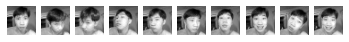

In [4]:
#To load my photo set
my_img= []
my_label = []
for i in os.listdir("MINE/OP/"):
    img = plt.imread("MINE/OP/"+i)
    my_img.append(img)
    my_label.append('myphoto')

# right here, I just mannually seperate my photos into 2 part, due to the number of photos is small. 
my_train_img = my_img[0:7]
my_test_img = my_img[7:10]
my_train_label = my_label[0:7]
my_test_label = my_label[7:10]

fig, axs = plt.subplots(1, 10)

for i in range(10):
    img = my_img[i]
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off') 
    
plt.show()

In [5]:
train_img.extend(my_train_img)
train_label.extend(my_train_label)
test_img.extend(my_test_img)
test_label.extend(my_test_label)
print("Now, Training set: {}  Testing set: {}".format(len(train_label), len(test_label)))

train_x = np.array(train_img)
train_y = np.array(train_label)
test_x = np.array(test_img)
test_y = np.array(test_label)
train_x = train_x.reshape(len(train_img), -1)
test_x = test_x.reshape(len(test_img), -1)
print("Training set {}    Testing set{}".format(train_x.shape, test_x.shape))


Now, Training set: 2982  Testing set: 1278
Training set (2982, 1024)    Testing set(1278, 1024)


In [6]:
from sklearn.decomposition import PCA
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [7]:
import matplotlib.colors as mcolors 

In [8]:
def scatter_plot_2D(x_data, y_label, title='title',x_ax='x_ax',y_ax='y_ax',colorlist=0,_class=str(i)):
    # format labels and colours
    label_set = list(set(y_label))
    if colorlist==0:
        colour_list=list(mcolors.CSS4_COLORS.keys())
    else:
        colour_list=['red','green',"blue"]*6
        
    if x_data.shape[1]==2: # if 2D
        y_label = np.array(y_label)
        fig = plt.figure()
        ax = plt
        for i, label in enumerate(label_set):
            if label == 'myphoto':
                ax.scatter(x_data[y_label == label, 0], x_data[y_label == label, 1],s=400, c='black',marker='*',label=label)
            else:
                ax.scatter(x_data[y_label == label, 0], x_data[y_label == label, 1],s=100,c=colour_list[i+5],edgecolors='white',label=label)
        ax.xlabel(x_ax)
        ax.ylabel(y_ax)
        plt.title(title)
        plt.legend(loc=(1.2, 0),title="As for Classes "+_class, ncol=2)
        plt.show()

    else:
        print('Error: Number of columns in data is not 2!')
        


In [9]:
# the scatter_plot can also be used for LDA PART!!

def scatter_plot_3D(x_data, y_label, title='title',x_ax='x_ax',y_ax='y_ax',z_ax='z_ax',colorlist=0,_class=str(i)):
    # format labels and colours
    label_set = list(set(y_label))
    if colorlist==0:         
        colour_list=list(mcolors.CSS4_COLORS.keys())     
    else:         
        colour_list=['red','green',"blue"]*6
      
    if x_data.shape[1]==3: # if 3D
        y_label = np.array(y_label)
        fig = plt.figure()
        ax = Axes3D(fig)
        for i, label in enumerate(label_set):
            if label == 'myphoto':
                ax.scatter(x_data[y_label == label, 0], x_data[y_label == label, 1], x_data[y_label == label, 2],s=400, c='black',marker='*',label=label)
            else:
                ax.scatter(x_data[y_label == label, 0], x_data[y_label == label, 1], x_data[y_label == label, 2],c=colour_list[i+5],s=100,edgecolors='white',label=label)
        ax.set_xlabel(x_ax)
        ax.set_ylabel(y_ax)
        ax.set_zlabel(z_ax)
        plt.title(title)
        plt.legend(loc=(1.2, 0),title="As for Classes "+_class, ncol=2)
        plt.show()
        
    else:
        print('Error: Number of columns in data is not 3!')
        


In [10]:
from sklearn import svm
from sklearn.mixture import GaussianMixture

In [13]:
print('To process data with PCA')
print('\n')

# PCA with 2 components
pca_2 = PCA(n_components=2)
pca_2.fit(train_x)
train_2 = pca_2.transform(train_x)
test_2 = pca_2.transform(test_x)

# PCA with 80 components
pca_80 = PCA(n_components=80)
pca_80.fit(train_x)
train_80 = pca_80.transform(train_x)
test_80 = pca_80.transform(test_x)

# PCA with 200 components
pca_200 = PCA(n_components=200)
pca_200.fit(train_x)
train_200 = pca_200.transform(train_x)
test_200 = pca_200.transform(test_x)

print('To generate GMM...')
print('\n')

# GMM works with PCA(2 components)
GMM_raw=GaussianMixture(n_components=3)
GMM_raw.fit(train_2)
pred_raw = GMM_raw.predict(train_2)

# GMM works with PCA(80 components)
GMM_80=GaussianMixture(n_components=3)
GMM_80.fit(train_80)
pred_80 = GMM_80.predict(train_80)

# GMM works with PCA(200 components)
GMM_200=GaussianMixture(n_components=3)
GMM_200.fit(train_200)
pred_200 = GMM_200.predict(train_200)


To process data with PCA


To generate GMM...




<h3>The below part is for raw dataset considering 2 components <h3>

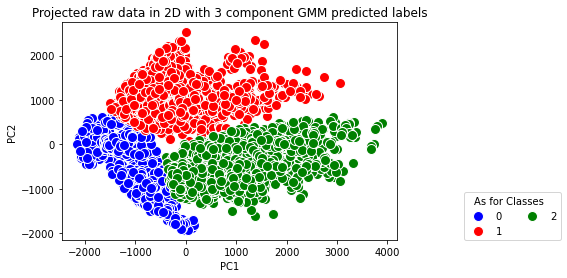

In [28]:
scatter_plot_2D(train_2[:,:2], pred_raw, 
                title='Projected raw data in 2D with 3 component GMM predicted labels',
                x_ax='PC1',y_ax='PC2',colorlist=1,_class=' ')
#scatter_plot_3D

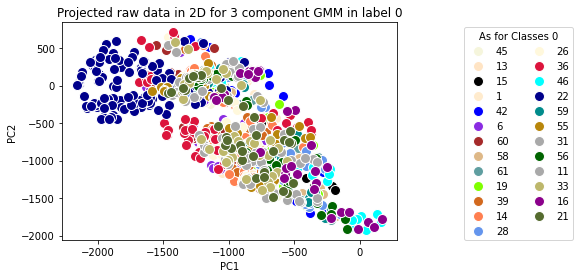

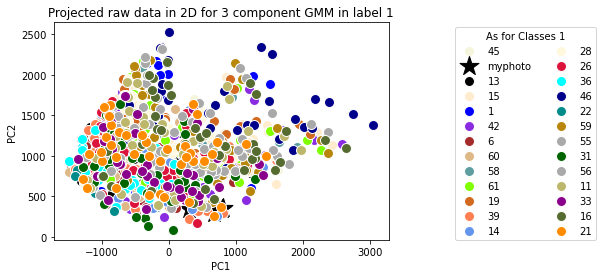

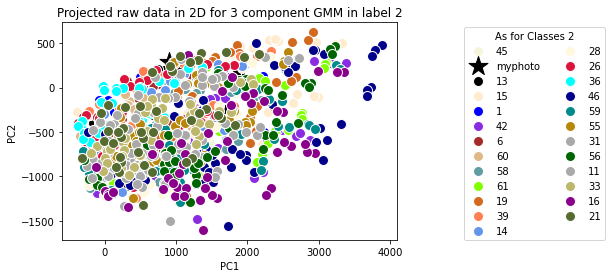

In [15]:
for label in range(0,3):    
    new_train_label = [train_y[i] for i in range(0, len(pred_raw)) if pred_raw[i]==label]
    scatter_plot_2D(train_2[pred_raw==label,:2], new_train_label, 
                    title='Projected raw data in 2D for 3 component GMM in label {}'.format(label),
                    x_ax='PC1',y_ax='PC2',colorlist=0,_class=str(label))
    

<h3>The below part is for dataset after PCA pre-processing with dimensionality of 80<h3>

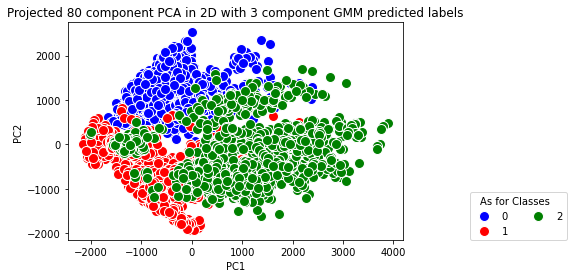

In [29]:
scatter_plot_2D(train_80[:,:2], pred_80, 
                title='Projected 80 component PCA in 2D with 3 component GMM predicted labels',
                x_ax='PC1',y_ax='PC2',colorlist=1,_class=' ')

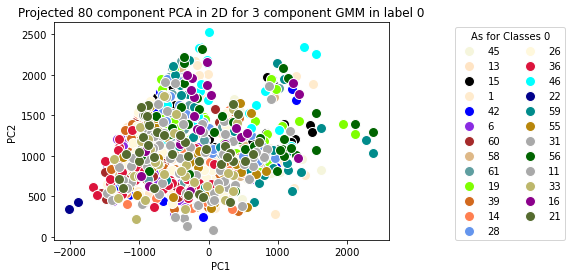

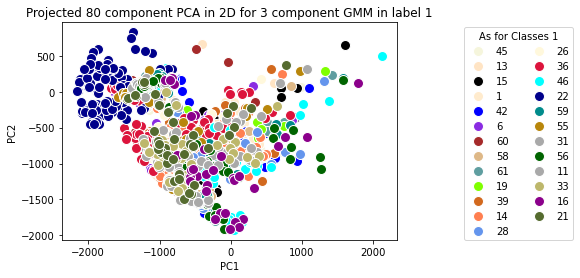

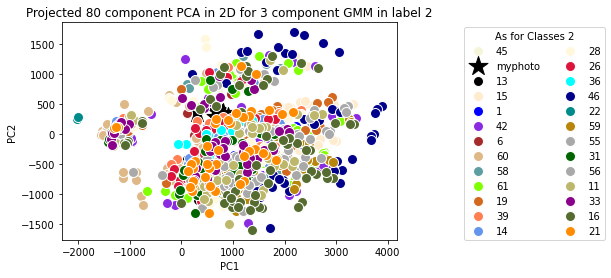

In [17]:
for label in range(0,3):        
    new_train_label = [train_y[i] for i in range(0, len(pred_80)) if pred_80[i]==label]     
    scatter_plot_2D(train_80[pred_80==label,:2], new_train_label, 
                    title='Projected 80 component PCA in 2D for 3 component GMM in label {}'.format(label),
                    x_ax='PC1',y_ax='PC2',colorlist=0,_class=str(label))

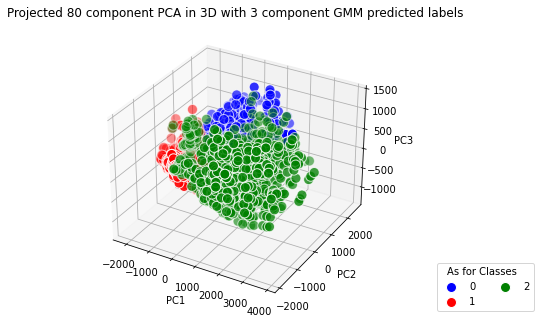

In [30]:
scatter_plot_3D(train_80[:,:3], pred_80, 
                title='Projected 80 component PCA in 3D with 3 component GMM predicted labels',
                x_ax='PC1',y_ax='PC2',z_ax='PC3',colorlist=1,_class=' ')

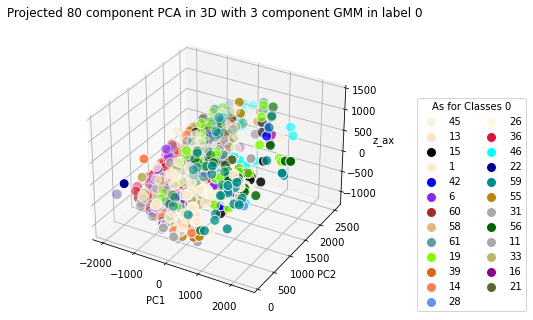

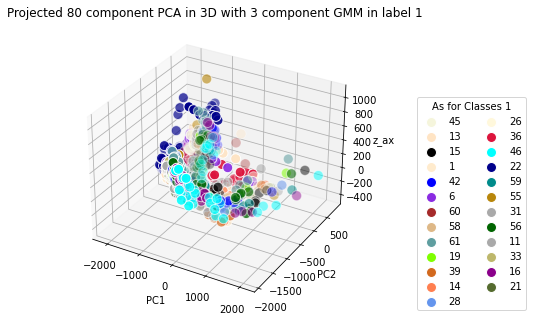

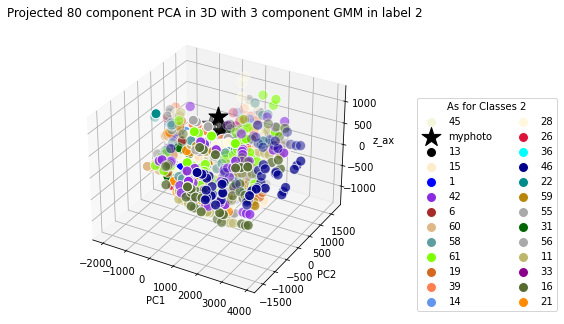

In [19]:
for label in range(0,3):        
    new_train_label = [train_y[i] for i in range(0, len(pred_80)) if pred_80[i]==label]     
    scatter_plot_3D(train_80[pred_80==label,:3], new_train_label, 
                    title='Projected 80 component PCA in 3D with 3 component GMM in label {}'.format(label),
                    x_ax='PC1',y_ax='PC2',colorlist=0,_class=str(label))

<h3>The below part is for dataset after PCA pre-processing with dimensionality of 200<h3>

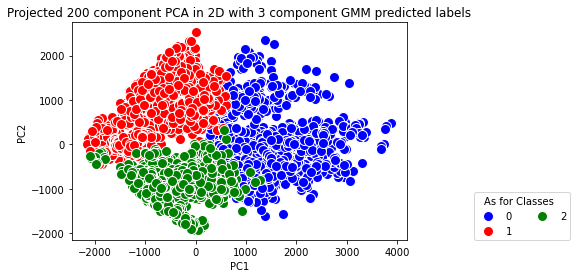

In [31]:
scatter_plot_2D(train_200[:,:2], pred_200, 
                title='Projected 200 component PCA in 2D with 3 component GMM predicted labels',
                x_ax='PC1',y_ax='PC2',colorlist=1,_class=' ')

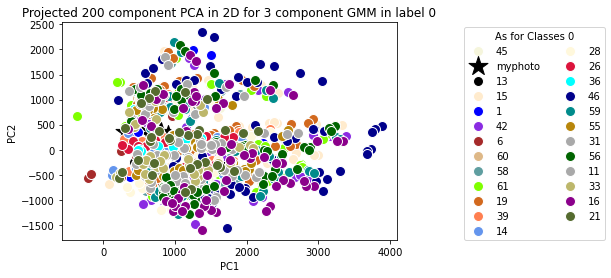

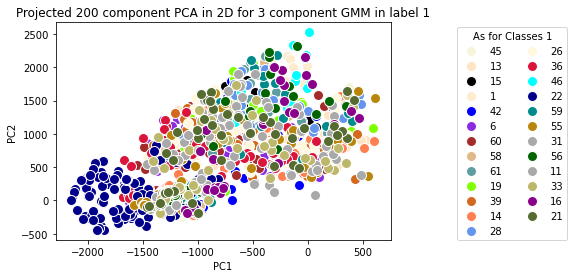

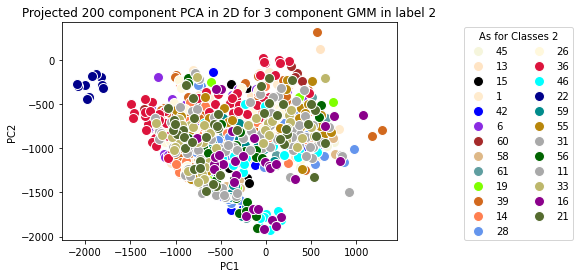

In [21]:
for label in range(0,3):             
    new_train_label = [train_y[i] for i in range(0, len(pred_200)) if pred_200[i]==label]          
    scatter_plot_2D(train_200[pred_200==label,:2], new_train_label, 
                    title='Projected 200 component PCA in 2D for 3 component GMM in label {}'.format(label),
                    x_ax='PC1',y_ax='PC2',colorlist=0,_class=str(label))

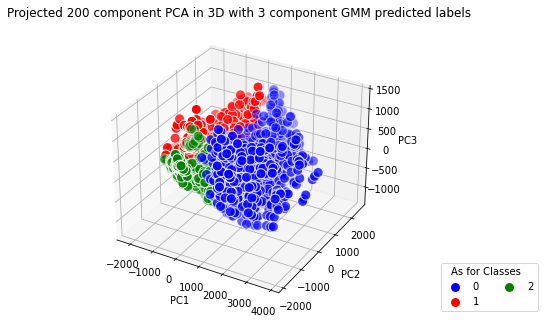

In [32]:
scatter_plot_3D(train_200[:,:3], pred_200, 
                title='Projected 200 component PCA in 3D with 3 component GMM predicted labels',
                x_ax='PC1',y_ax='PC2',z_ax='PC3',colorlist=1,_class=' ')

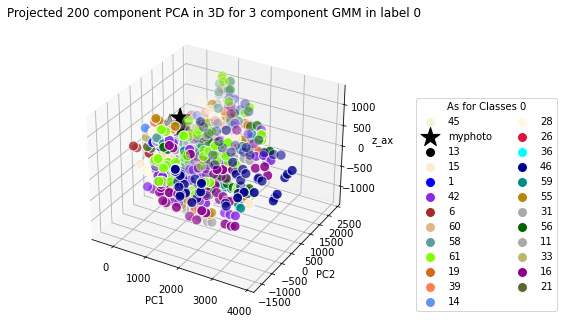

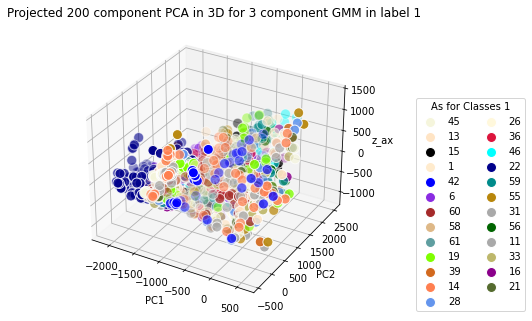

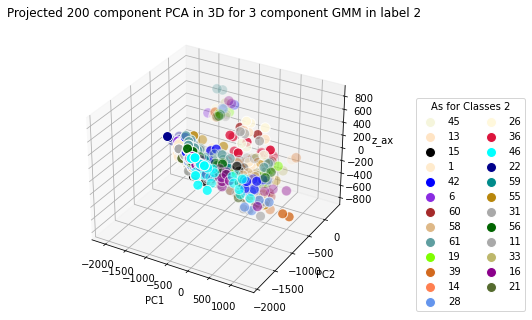

In [23]:
for label in range(0,3):            
    new_train_label = [train_y[i] for i in range(0, len(pred_200)) if pred_200[i]==label]          
    scatter_plot_3D(train_200[pred_200==label,:3], new_train_label, 
                    title='Projected 200 component PCA in 3D for 3 component GMM in label {}'.format(label),
                    x_ax='PC1',y_ax='PC2',colorlist=0,_class=str(label))